In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import os

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

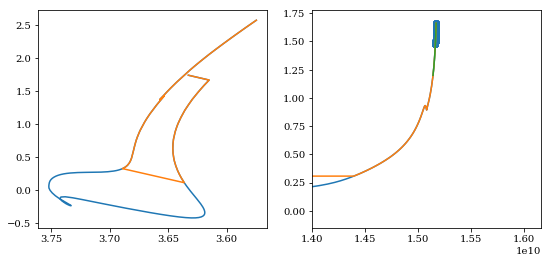

In [8]:
folder = "~/Documents/mesa/work/"
file = "LOGS/M1.0_Y0.25_mmdd.data"

df = pd.read_csv(folder+file, skiprows=5, delim_whitespace=True)
#display(df)

plt.figure(1, figsize=(9,4))
plt.subplot(121)
plt.plot(df['log_Teff'], df['log_L'])
plt.plot(df.loc[(df.log_R > 0.3)].log_Teff, df.loc[(df.log_R > 0.3)].log_L)
plt.gca().invert_xaxis()
plt.subplot(122)
plt.plot(df['star_age'], df['log_R'])
plt.plot(df.loc[(df.log_R > 0.3)].star_age, df.loc[(df.log_R > 0.3)].log_R)
plt.plot(df.loc[(df.log_R > 1.2)].star_age, df.loc[(df.log_R > 1.2)].log_R)
plt.scatter(df.loc[(df.log_center_T > 7.65)].star_age, df.loc[(df.log_center_T > 7.65)].log_R)
plt.xlim(1.4e10,)
plt.show()

4.222467334891586


,l,n_pg,Re(freq),Im(freq),E_norm
0,0,2,11.582128,0.0,0.001116
1,0,3,15.992400,0.0,0.000107
2,0,4,19.665932,0.0,0.000023
3,0,5,23.491569,0.0,0.000011
4,0,6,27.211936,0.0,0.000006
5,0,7,31.214866,0.0,0.000005
6,0,8,35.231972,0.0,0.000004
7,0,9,39.307647,0.0,0.000004
8,0,10,43.480048,0.0,0.000004
9,0,11,47.653435,0.0,0.000004


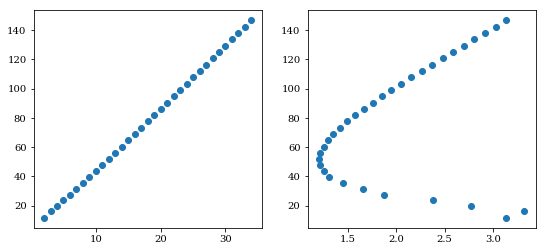

In [6]:
folder = "~/Documents/mesa/work/"
file = "gyre/gyresummary.txt"

dg = pd.read_csv(folder+file, skiprows=5, delim_whitespace=True)#, names=['l', 'n', 'f0', 'f0im', 'e_norm'])
#dg['Re(freq)'] = dg['Re(freq)']*2*np.pi
dnuavg = np.mean(np.diff(dg['Re(freq)']))
print(dnuavg)
display(dg.head(10))

plt.figure(3, figsize=(9,4))
plt.subplot(121)
plt.scatter(dg['n_pg'], dg['Re(freq)'])
plt.subplot(122)
plt.scatter(dg['Re(freq)'] % dnuavg, dg['Re(freq)'])
plt.show()

In [112]:
file = "M1.0_Y0.25_mmdd.index"
dh = pd.read_csv(folder+file, skiprows=1, delim_whitespace=True, names=['model','priority','profile'])
prof1 = dh.loc[(dh.priority == 1)]['model'].min()
prof2 = dh.loc[(dh.priority == 1)]['model'].max()
prof = [prof1, prof2]

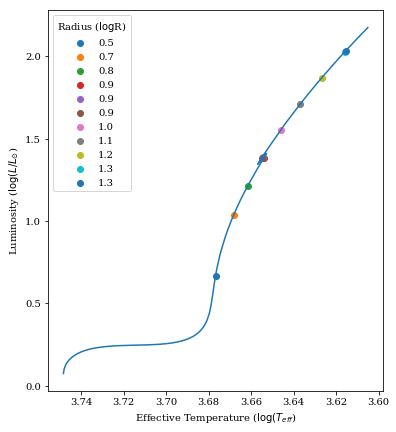

In [3]:
df = pd.read_csv('~/Documents/mesa/M1.0_Y0.24_0211.data', skiprows=5, delim_whitespace=True)
pts = pd.read_csv('~/Documents/mesa/M1.0_Y0.24_0211.index', skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
pts = pts.loc[(pts.priority == 1)]['model']

# This section of code is a test of a modification to the run_star_extras.f file
# that outputs a profile file when the star increases in radius in 0.1 log_R units.
# The conditions applied also allow multiple profiles to be produced for the region
# around the RGB bump.

# NOTE: This test appears to have been successful, and will now be applied to the
# grid of models.

plt.figure(1, figsize=(6,7))
df = df.loc[(df.he_core_mass != 0.0)]
plt.plot(df['log_Teff'], df['log_L'], label='')
#plt.scatter(df.loc[(df.model_number == 1500)]['log_Teff'],
#                df.loc[(df.model_number == 1500)]['log_L'], marker='x')
#plt.scatter(df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_Teff'],
#                df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_L'], alpha=0.5)
for i in pts:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'],
                label = f'{label[0]:.1f}')
          
          
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
plt.legend(title=r'Radius ($\log$R)')


plt.show()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


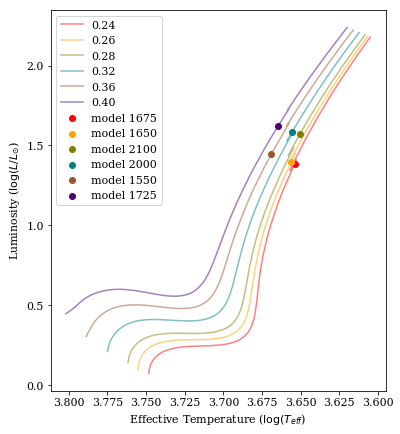

In [179]:
import os
import glob
#folder = "~/Documents/mesa/models/"
#files = sorted(os.listdir('/home/daniel/Documents/mesa/models/'))
#dfs = [pd.read_csv(folder+str(i), skiprows=5, delim_whitespace=True) for i in files]
directory = '/home/daniel/Documents/mesa/LOGS/'

folders = sorted(os.listdir(directory))
files = [glob.glob(directory + i + '/*.data') for i in folders]
profs = [glob.glob(directory + i + '/*.index') for i in folders]
import itertools
colours = itertools.cycle(('r', 'orange', 'olive', 'teal', 'sienna', 'indigo'))#, 'black'))
## Need to develop tool for taking Y values and masses and allocating colours/linestyles (to-do)

Y = 0.24
M = 1.0



plt.figure(1, figsize=(6,7))
for i,j in zip(files, profs):
    
    
    df = pd.read_csv(i[0], skiprows=5, delim_whitespace=True)
    df = df.loc[(df.he_core_mass != 0.0)]
    dg = pd.read_csv(j[0], skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
    dg = dg.loc[(dg.priority == 1) & (dg.profile == 7)]['model']
    pt = dg.values
    if not pt:
        continue
    else:
        if str(i[0][42:45]) == str(M):
            colour = next(colours)
            label = 'model '+str(int(pt))
            plt.scatter(df.loc[(df.model_number == int(pt))]['log_Teff'],
                    df.loc[(df.model_number == int(pt))]['log_L'], c=colour, label=label)
            label = str(i[0][47:51])
            #label = str(i[0][42:45])
            plt.plot(df['log_Teff'], df['log_L'], c=colour, zorder=0,
                     alpha=0.5, label=label)
    
    
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
#plt.legend(['0.24', '0.26', '0.28', '0.32', '0.36', '0.40'], title=r'$Y_{init}$')
plt.legend()
plt.show()


In [4]:
%matplotlib tk
directory = '/home/daniel/Documents/mesa/'
history = directory + 'M1.8_Y0.40_Z+0.15_0219.data'
index = directory + 'M1.8_Y0.40_Z+0.15_0219.index'
df = pd.read_csv(history, skiprows=5, delim_whitespace=True)
pts = pd.read_csv(index, skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
#pts = pts['model']
pts1 = pts.loc[(pts.priority == 1)]['model']
pts2 = pts.loc[(pts.priority == 2)]['model']
#print(pts)

plt.figure(1, figsize=(6,7))
#df = df.loc[(df.he_core_mass != 0.0)]
plt.plot(df['log_Teff'], df['log_L'], label='')
for i in pts1:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'],)
for i in pts2:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'], marker='x')
                #label = f'{label[0]:.1f}')
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
#plt.legend()
plt.show()